# YOLOv8 Test Notebook
We will use this notebook as a method for testing and running the YOLOv8 architecture, and getting a sense of what the architecture looks like.

In [2]:
from ultralytics import YOLO

# Install and load the yolo v8 model
model = YOLO("yolov8n.pt")

First let's run the architecture on an image and look at the output. The base YOLOv8 is trained on the COCO dataset which has a collection of IDs we can work with for image identification. We're going to have the detector run on an image of zebras. 


0: 480x640 3 zebras, 122.3ms
Speed: 22.3ms preprocess, 122.3ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


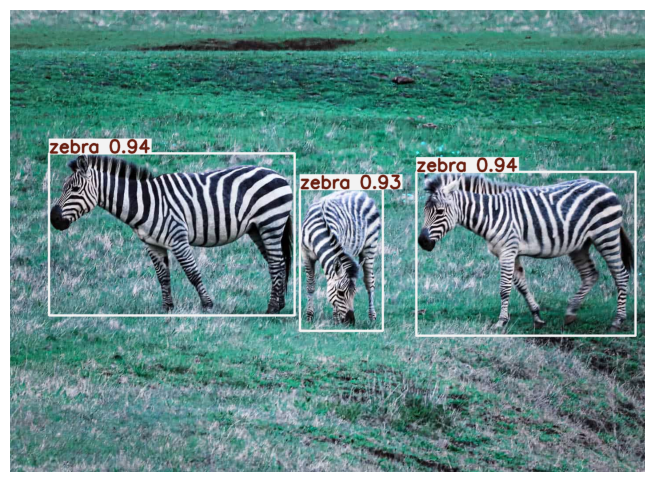

In [2]:
import cv2
import matplotlib.pyplot as plt

# Select the image to scan
IMG_PATH = "res/zebras.jpg"

# Read that
image = cv2.imread(IMG_PATH)

results = model(image, device="cpu")

# Draws the annotated plot
img_annotated = results[0].plot()  # draws boxes on the image

# Plot the selected frame
plt.figure(figsize=(10, 6))
plt.imshow(img_annotated)
plt.axis("off")
plt.show()

Our goal with this project is to *at least* implement the forward pass of the YOLOv8 model. To ensure that the forward pass is functional and produces expected results, we will develop a pipeline to take the model weights of a pretrained model, and export them to a binary format which our pipeline can import and process.

Let's see if we can at least pull the weights and biases of the first layer.

In [3]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
   

In [7]:
print(model.model.model[0].conv.weight[0])
print(model.model.model[0].conv.weight[0].flatten().numpy().tobytes().hex())
print(model.model.model[0].conv.bias)

tensor([[[-2.0544, -0.1887,  1.9064],
         [-6.5635,  0.5963,  6.9073],
         [-6.0107, -0.2439,  5.5624]],

        [[-2.5375,  0.1741,  2.7137],
         [-8.7353,  0.4975,  8.2043],
         [-6.6418, -0.0491,  6.2066]],

        [[-0.8890, -0.2656,  0.4437],
         [-3.8106,  0.5865,  3.4558],
         [-2.7355,  0.5547,  2.7899]]])
7b7a03c0b92d41bedc03f43fff07d2c011a6183fc108dd40ca57c0c0b8b979be4fffb140ee6522c09e46323effad2d40f7c30bc14fbdfe3e00450341ca89d4c0111e49bd469cc6408c9463bf460188be9529e33e34e073c04624163f692c5d408d122fc072fe0d3fee8d3240
Parameter containing:
tensor([ 1.3607,  2.8756,  1.5950,  1.5212,  6.7134,  1.3814,  4.3184,  3.6545,  1.6563,  1.4089,  3.0914,  2.4182, -0.6493,  1.4663, -2.8061,  1.6852])


# Binary file testing

(250, 202, 3)

Forward hook for the first layer triggered!
Input shape: torch.Size([1, 3, 640, 640])
Output shape: torch.Size([1, 16, 320, 320])
Forward hook for the first layer triggered!
Input shape: torch.Size([1, 3, 640, 640])
Output shape: torch.Size([1, 16, 320, 320])
Forward hook for the first layer triggered!
Input shape: torch.Size([1, 3, 640, 640])
Output shape: torch.Size([1, 16, 320, 320])
0: 640x640 1 bear, 175.8ms
Speed: 3.7ms preprocess, 175.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
[92 91 87]
[118  96  66]
[146 102  43]
[92 90 86]
[117  96  66]
[146 102  43]
tensor([[ 1.3658e+01,  1.2265e+00,  1.6734e+00,  ...,  2.8775e+00,  1.3797e+00,  1.4578e+00],
        [ 1.4845e+01,  1.2115e+00,  1.5668e+00,  ...,  2.2127e+00,  1.0435e+00,  1.0736e+00],
        [ 1.4166e+01,  1.7317e+00,  1.9171e+00,  ...,  1.9630e+00,  1.0675e+00,  1.0740e+00],
        ...,
        [ 7.2142e+00,  4.2326e+00,  6.2167e+00,  ...,  3.0965e+00,  1.3896e+00,  1.1214e+00],
   

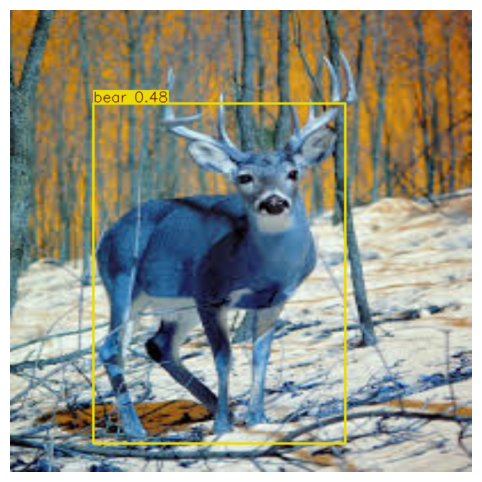

In [39]:
layer_1_out = None;

def first_layer_hook_fn(module, input, output):
    print("Forward hook for the first layer triggered!")
    print(f"Input shape: {input[0].shape}")
    print(f"Output shape: {output.shape}")
    output.detach()
    global layer_1_out
    layer_1_out = output;
        # You can store or process the input/output here
        # For example, to store the output:
        # first_layer_output = output.detach()

        # Accessing the first module in the model's architecture
first_layer = model.model.model[0]
hook_handle = first_layer.register_forward_hook(first_layer_hook_fn)

import cv2
import matplotlib.pyplot as plt

# Select the image to scan
IMG_PATH = "deer.jpg"

# Read that
image = cv2.imread(IMG_PATH)
print(image.shape)
image = cv2.resize(image, (640, 640))

results = model(image, device="cpu")
hook_handle.remove()
# Draws the annotated plot
img_annotated = results[0].plot()  # draws boxes on the image
print(image[0][1])
print(image[0][2])
print(image[0][3])
print(image[1][1])
print(image[1][2])
print(image[1][3])

#print(hook_handle)
print(layer_1_out[0][0])

# Plot the selected frame
plt.figure(figsize=(10, 6))
plt.imshow(img_annotated)
plt.axis("off")
plt.show()


In [38]:
#print(model.model.model[2].m[0].cv1.conv.weight[0])
#print(model.model.model[2].m[0].cv1.conv.weight[0].flatten())
print(model.model.model[0].conv.weight[1])
print(model.model.model[0].conv.bias.flatten())
print(list(model.model.model[0].conv.named_parameters()))
print("print still works")
#print(model.model.model[2].m[0].cv1.conv.weight[0].flatten())
#print(model.model.model[2].m[0].cv2.conv.bias.flatten())
# having problems with convolution 2 in bottleneck --> FIXED LOOK AT PYTHON BINARY FILE WRITING

tensor([[[  0.9236,   1.4203,   0.6190],
         [ -0.2046,  -1.8035,   0.2250],
         [ -1.2826, -10.6375,  -1.3102]],

        [[ -0.7147,   0.9132,   0.0654],
         [ -0.5507,  -2.0295,  -0.4463],
         [ -1.5672, -10.5732,  -1.6888]],

        [[ -0.1461,   0.3247,  -0.2736],
         [  0.2558,  -0.6333,   0.4735],
         [  0.7670,  -4.6120,   1.3928]]])
Parameter containing:
tensor([ 1.3607,  2.8756,  1.5950,  1.5212,  6.7134,  1.3814,  4.3184,  3.6545,  1.6563,  1.4089,  3.0914,  2.4182, -0.6493,  1.4663, -2.8061,  1.6852])
[('weight', Parameter containing:
tensor([[[[-2.0544e+00, -1.8865e-01,  1.9064e+00],
          [-6.5635e+00,  5.9628e-01,  6.9073e+00],
          [-6.0107e+00, -2.4387e-01,  5.5624e+00]],

         [[-2.5375e+00,  1.7410e-01,  2.7137e+00],
          [-8.7353e+00,  4.9754e-01,  8.2043e+00],
          [-6.6418e+00, -4.9101e-02,  6.2066e+00]],

         [[-8.8899e-01, -2.6563e-01,  4.4368e-01],
          [-3.8106e+00,  5.8649e-01,  3.4558e+00],
    

In [57]:
print(model.model.model[22].cv2[1][1].weight)
print(model.model.model[22].cv2[1][1].bias.flatten())


AttributeError: 'Conv' object has no attribute 'weight'

In [74]:
import numpy as np

filename = "filters.bin"

# order in model is Conv2d(channels, filters, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
# c2f layers may have more than 1 bottleneck
# struct order: dim, channels, stride, padding, filters

struct_index_0 = np.array([3,3,2,1,16], dtype = np.int32)
struct_index_0_bytes = struct_index_0.tobytes()
print(struct_index_0_bytes)

# Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)
struct_index_1_bytes = np.array([3, 16, 2, 1, 32], dtype = np.int32).tobytes()

# first c2f layer
# 1 conv, then split, bottleneck of 2 conv, concat, then conv again (total 4 conv)
# CV1 (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
struct_index_2_c1_bytes = np.array([1, 32, 1, 0, 32], dtype = np.int32).tobytes()
# bottleneck conv 1
# Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
struct_index_2_c1_b1_bytes = np.array([3, 16, 1, 1, 16], dtype = np.int32).tobytes()
# bottleneck conv 2               
# Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
struct_index_2_c2_b1_bytes = np.array([3, 16, 1, 1, 16], dtype = np.int32).tobytes()
# CV2 (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
struct_index_2_c2_bytes = np.array([1, 48, 1, 0, 32], dtype = np.int32).tobytes()

#         (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
struct_index_3_bytes = np.array([3,32,2,1,64], dtype = np.int32).tobytes()

#c2f at index 4 (has 2 bottlenecks)
#           (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
struct_index_4_c1_bytes = np.array([1, 64, 1, 0, 64], dtype = np.int32).tobytes()
#bottleneck 1
struct_index_4_c1_b1_bytes = np.array([3, 32, 1, 1, 32], dtype = np.int32).tobytes()
struct_index_4_c2_b1_bytes = np.array([3, 32, 1, 1, 32], dtype = np.int32).tobytes()
#bottleneck 2
struct_index_4_c1_b2_bytes = np.array([3, 32, 1, 1, 32], dtype = np.int32).tobytes()
struct_index_4_c2_b2_bytes = np.array([3, 32, 1, 1, 32], dtype = np.int32).tobytes()
struct_index_4_c2_bytes = np.array([1, 128, 1, 0, 64], dtype = np.int32).tobytes()

# Index 5
struct_index_5_bytes = np.array([3,64,2,1,128], dtype = np.int32).tobytes()

# Index 6 C2F
struct_index_6_c1_bytes = np.array([1, 128, 1, 0, 128], dtype = np.int32).tobytes()
#bottleneck 1
struct_index_6_c1_b1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_6_c2_b1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
#bottleneck 2
struct_index_6_c1_b2_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_6_c2_b2_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_6_c2_bytes = np.array([1, 256, 1, 0, 128], dtype = np.int32).tobytes()

# Index 7
struct_index_7_bytes = np.array([3, 128, 2, 1, 256], dtype = np.int32).tobytes()

# Index 8 (Single bottleneck C2f)
struct_index_8_c1_bytes = np.array([1, 256, 1, 0, 256], dtype = np.int32).tobytes()
# 1 bottleneck conv 1
struct_index_8_c1_b1_bytes = np.array([3, 128, 1, 1, 128], dtype = np.int32).tobytes()
# 1 bottleneck conv 2               
struct_index_8_c2_b1_bytes = np.array([3, 128, 1, 1, 128], dtype = np.int32).tobytes()
struct_index_8_c2_bytes = np.array([1, 384, 1, 0, 256], dtype = np.int32).tobytes()

#Index 9 (SPPF)
struct_index_9_c1_bytes = np.array([1, 256, 1, 0, 128], dtype = np.int32).tobytes()
struct_index_9_c2_bytes = np.array([1, 512, 1, 0, 256], dtype = np.int32).tobytes()

#Index 12 C2F:
struct_index_12_c1_bytes = np.array([1, 384, 1, 0, 128], dtype = np.int32).tobytes()
# 1 bottleneck conv 1
struct_index_12_c1_b1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
# 1 bottleneck conv 2               
struct_index_12_c2_b1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_12_c2_bytes = np.array([1, 512, 1, 0, 256], dtype = np.int32).tobytes()

#Index 15 C2F:
struct_index_15_c1_bytes = np.array([1, 192, 1, 0, 64], dtype = np.int32).tobytes()
# 1 bottleneck conv 1
struct_index_15_c1_b1_bytes = np.array([3, 32, 1, 1, 32], dtype = np.int32).tobytes()
# 1 bottleneck conv 2               
struct_index_15_c2_b1_bytes = np.array([3, 32, 1, 1, 32], dtype = np.int32).tobytes()
struct_index_15_c2_bytes = np.array([1, 96, 1, 0, 64], dtype = np.int32).tobytes()

#Index 16: 
struct_index_16_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()

#Index 18:
struct_index_18_c1_bytes = np.array([1, 192, 1, 0, 128], dtype = np.int32).tobytes()
# 1 bottleneck conv 1
struct_index_18_c1_b1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
# 1 bottleneck conv 2               
struct_index_18_c2_b1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_18_c2_bytes = np.array([1, 192, 1, 0, 128], dtype = np.int32).tobytes()

#Index 19:
struct_index_19_bytes = np.array([3, 128, 2, 1, 128], dtype = np.int32).tobytes()

#Index 21:
struct_index_21_c1_bytes = np.array([1, 384, 1, 0, 256], dtype = np.int32).tobytes()
# 1 bottleneck conv 1
struct_index_21_c1_b1_bytes = np.array([3, 128, 1, 1, 128], dtype = np.int32).tobytes()
# 1 bottleneck conv 2               
struct_index_21_c2_b1_bytes = np.array([3, 128, 1, 1, 128], dtype = np.int32).tobytes()
struct_index_21_c2_bytes = np.array([1, 384, 1, 0, 256], dtype = np.int32).tobytes()

#Index 22: DETECT
# first layer (cv2 0)
struct_index_22_cv2_0_0_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_22_cv2_0_1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_22_cv2_0_2_bytes = np.array([1, 64, 1, 0, 64], dtype = np.int32).tobytes()
# (cv2 1)
struct_index_22_cv2_1_0_bytes = np.array([3, 128, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_22_cv2_1_1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_22_cv2_1_2_bytes = np.array([1, 64, 1, 0, 64], dtype = np.int32).tobytes()
# cv 2 2
struct_index_22_cv2_2_0_bytes = np.array([3, 256, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_22_cv2_2_1_bytes = np.array([3, 64, 1, 1, 64], dtype = np.int32).tobytes()
struct_index_22_cv2_2_2_bytes = np.array([1, 64, 1, 0, 64], dtype = np.int32).tobytes()

#cv 3
struct_index_22_cv3_0_0_bytes = np.array([3, 64, 1, 1, 80], dtype = np.int32).tobytes()
struct_index_22_cv3_0_1_bytes = np.array([3, 80, 1, 1, 80], dtype = np.int32).tobytes()
struct_index_22_cv3_0_2_bytes = np.array([1, 80, 1, 0, 80], dtype = np.int32).tobytes()
# (cv2 1)
struct_index_22_cv3_1_0_bytes = np.array([3, 128, 1, 1, 80], dtype = np.int32).tobytes()
struct_index_22_cv3_1_1_bytes = np.array([3, 80, 1, 1, 80], dtype = np.int32).tobytes()
struct_index_22_cv3_1_2_bytes = np.array([1, 80, 1, 0, 80], dtype = np.int32).tobytes()
# cv 2 2
struct_index_22_cv3_2_0_bytes = np.array([3, 256, 1, 1, 80], dtype = np.int32).tobytes()
struct_index_22_cv3_2_1_bytes = np.array([3, 80, 1, 1, 80], dtype = np.int32).tobytes()
struct_index_22_cv3_2_2_bytes = np.array([1, 64, 1, 0, 80], dtype = np.int32).tobytes()

# dfl
struct_index_22_dfl = np.array([1, 16, 1, 0, 1], dtype = np.int32).tobytes()
false_bias = 0;
zero_bytes = false_bias.to_bytes(4, byteorder='little')
# false_bias_to_bytes = false_bias.tobytes()

#################################################

with open(filename, "wb") as file:
    #index 0
    file.write(struct_index_0_bytes);
    for i in range(16):
        file.write(model.model.model[0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[0].conv.bias[i].numpy().tobytes())
    #index 1
    file.write(struct_index_1_bytes);
    for i in range(32):
        file.write(model.model.model[1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[1].conv.bias[i].numpy().tobytes())

    #index 2
    file.write(struct_index_2_c1_bytes);
    for i in range(32):
        file.write(model.model.model[2].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[2].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_2_c1_b1_bytes);
    for i in range(16):
        file.write(model.model.model[2].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[2].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_2_c2_b1_bytes);
    for i in range(16):
        file.write(model.model.model[2].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[2].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_2_c2_bytes);
    for i in range(32):
        file.write(model.model.model[2].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[2].cv2.conv.bias[i].numpy().tobytes())

    #index 3
    file.write(struct_index_3_bytes);
    for i in range(64):
        file.write(model.model.model[3].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[3].conv.bias[i].numpy().tobytes())
    
    #C2f At Index 4 of architecture
    file.write(struct_index_4_c1_bytes)
    for i in range(64):
        file.write(model.model.model[4].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[4].cv1.conv.bias[i].numpy().tobytes());
    file.write(struct_index_4_c1_b1_bytes)
    for i in range(32):
        file.write(model.model.model[4].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[4].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_4_c2_b1_bytes)
    for i in range(32):
        file.write(model.model.model[4].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[4].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_4_c1_b2_bytes)
    for i in range(32):
        file.write(model.model.model[4].m[1].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[4].m[1].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_4_c2_b2_bytes)
    for i in range(32):
        file.write(model.model.model[4].m[1].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[4].m[1].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_4_c2_bytes)
    for i in range(64):
        file.write(model.model.model[4].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[4].cv2.conv.bias[i].numpy().tobytes());

    #Index 5
    file.write(struct_index_5_bytes);
    for i in range(128):
        file.write(model.model.model[5].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[5].conv.bias[i].numpy().tobytes())

    #Index 6
    file.write(struct_index_6_c1_bytes)
    for i in range(128):
        file.write(model.model.model[6].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[6].cv1.conv.bias[i].numpy().tobytes());
    file.write(struct_index_6_c1_b1_bytes)
    for i in range(64):
        file.write(model.model.model[6].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[6].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_6_c2_b1_bytes)
    for i in range(64):
        file.write(model.model.model[6].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[6].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_6_c1_b2_bytes)
    for i in range(64):
        file.write(model.model.model[6].m[1].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[6].m[1].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_6_c2_b2_bytes)
    for i in range(64):
        file.write(model.model.model[6].m[1].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[6].m[1].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_6_c2_bytes)
    for i in range(128):
        file.write(model.model.model[6].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[6].cv2.conv.bias[i].numpy().tobytes());

    #Index 7
    file.write(struct_index_7_bytes)
    for i in range(256):
        file.write(model.model.model[7].conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[7].conv.bias[i].numpy().tobytes());

    #index 8
    file.write(struct_index_8_c1_bytes);
    for i in range(256):
        file.write(model.model.model[8].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[8].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_8_c1_b1_bytes);
    for i in range(128):
        file.write(model.model.model[8].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[8].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_8_c2_b1_bytes);
    for i in range(128):
        file.write(model.model.model[8].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[8].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_8_c2_bytes);
    for i in range(256):
        file.write(model.model.model[8].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[8].cv2.conv.bias[i].numpy().tobytes())
    
    #index 9 (SPPF)
    file.write(struct_index_9_c1_bytes);
    for i in range(128):
        file.write(model.model.model[9].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[9].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_9_c2_bytes);
    for i in range(256):
        file.write(model.model.model[9].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[9].cv2.conv.bias[i].numpy().tobytes())

    #index 12 (single bottleneck c2f)
    file.write(struct_index_12_c1_bytes);
    for i in range(128):
        file.write(model.model.model[12].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[12].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_12_c1_b1_bytes);
    for i in range(64):
        file.write(model.model.model[12].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[12].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_12_c2_b1_bytes);
    for i in range(64):
        file.write(model.model.model[12].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[12].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_12_c2_bytes);
    for i in range(128):
        file.write(model.model.model[12].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[12].cv2.conv.bias[i].numpy().tobytes())

    #index 15 (single bottleneck c2f)
    file.write(struct_index_15_c1_bytes);
    for i in range(64):
        file.write(model.model.model[15].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[15].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_15_c1_b1_bytes);
    for i in range(32):
        file.write(model.model.model[15].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[15].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_15_c2_b1_bytes);
    for i in range(32):
        file.write(model.model.model[15].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[15].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_15_c2_bytes);
    for i in range(64):
        file.write(model.model.model[15].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[15].cv2.conv.bias[i].numpy().tobytes())

    #Index 16
    file.write(struct_index_16_bytes)
    for i in range(64):
        file.write(model.model.model[16].conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[16].conv.bias[i].numpy().tobytes());

    #index 18 (single bottleneck c2f)
    file.write(struct_index_18_c1_bytes);
    for i in range(128):
        file.write(model.model.model[18].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[18].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_18_c1_b1_bytes);
    for i in range(64):
        file.write(model.model.model[18].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[18].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_18_c2_b1_bytes);
    for i in range(64):
        file.write(model.model.model[18].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[18].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_18_c2_bytes);
    for i in range(128):
        file.write(model.model.model[18].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[18].cv2.conv.bias[i].numpy().tobytes())

    #index 19
    file.write(struct_index_19_bytes)
    for i in range(128):
        file.write(model.model.model[19].conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[19].conv.bias[i].numpy().tobytes());

    #index 21
    file.write(struct_index_21_c1_bytes);
    for i in range(256):
        file.write(model.model.model[21].cv1.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[21].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_21_c1_b1_bytes);
    for i in range(128):
        file.write(model.model.model[21].m[0].cv1.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[21].m[0].cv1.conv.bias[i].numpy().tobytes())
    file.write(struct_index_21_c2_b1_bytes);
    for i in range(128):
        file.write(model.model.model[21].m[0].cv2.conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[21].m[0].cv2.conv.bias[i].numpy().tobytes())
    file.write(struct_index_21_c2_bytes);
    for i in range(256):
        file.write(model.model.model[21].cv2.conv.weight[i].flatten().numpy().tobytes());
        file.write(model.model.model[21].cv2.conv.bias[i].numpy().tobytes())

    #index 22 (DETECT)
    # cv 2 0
    file.write(struct_index_22_cv2_0_0_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[0][0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[0][0].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv2_0_1_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[0][1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[0][1].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv2_0_2_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[0][2].weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[0][2].bias[i].numpy().tobytes())
    # cv 2 1
    file.write(struct_index_22_cv2_1_0_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[1][0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[1][0].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv2_1_1_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[1][1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[1][1].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv2_1_2_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[1][2].weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[1][2].bias[i].numpy().tobytes())
    # cv 2 2
    file.write(struct_index_22_cv2_2_0_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[2][0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[2][0].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv2_2_1_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[2][1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[2][1].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv2_2_2_bytes);
    for i in range(64):
        file.write(model.model.model[22].cv2[2][2].weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv2[2][2].bias[i].numpy().tobytes())
    #cv 3 0
    file.write(struct_index_22_cv3_0_0_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[0][0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[0][0].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv3_0_1_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[0][1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[0][1].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv3_0_2_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[0][2].weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[0][2].bias[i].numpy().tobytes())
    #cv 3 1
    file.write(struct_index_22_cv3_1_0_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[1][0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[1][0].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv3_1_1_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[1][1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[1][1].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv3_1_2_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[1][2].weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[1][2].bias[i].numpy().tobytes())
    # cv 3 2
    file.write(struct_index_22_cv3_2_0_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[2][0].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[2][0].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv3_2_1_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[2][1].conv.weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[2][1].conv.bias[i].numpy().tobytes())
    file.write(struct_index_22_cv3_2_2_bytes);
    for i in range(80):
        file.write(model.model.model[22].cv3[2][2].weight[i].flatten().numpy().tobytes())
        file.write(model.model.model[22].cv3[2][2].bias[i].numpy().tobytes())

    #dfl
    file.write(model.model.model[22].dfl.conv.weight[0].flatten().numpy().tobytes());
    file.write(zero_bytes);
        


b'\x03\x00\x00\x00\x03\x00\x00\x00\x02\x00\x00\x00\x01\x00\x00\x00\x10\x00\x00\x00'
